In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import filament_functions as fils 
import read_fils as rf

In [3]:
nsig=3
name='cosmoDC2_v1.1.4_small_with_photozs_v1.TPZ.hpix9816.stamp.67.25.67.75.-37.5.-37.zslice.photo.0.6.0.8.curved.disperse'
#name='cosmoDC2_v1.1.4_small_with_photozs_v1.healpix_pixel9816.stamp.67.25.67.75.-37.5.-37.zslice.photo.0.6.0.8-curved-disperse'

In [4]:
path_to_skel = f'../Catalogs/{name}_nsig{nsig}_final.S002.BRK.a.NDskl'
#path_to_skel = f'../Catalogs/{name}_final.S002.BRK.a.NDskl'

In [5]:
filaments=rf.ReadFilament2D(path_to_skel)
#115 filaments in pre mse version
#224 filaments in sigma 7 for mse version
#200 for 8
#176 for 9
#170 for 10

header1, ANDSKEL

ndims, 2

Comments, #No comments (RB)

Bounding box, BBOX [-15.2186,-15.2153] [30.4117,30.4381]

ncrit, 170
nfils, 126
Reading data fields:
CP field: persistence_ratio

CP field: persistence_nsigmas

CP field: persistence

CP field: persistence_pair

CP field: parent_index

CP field: parent_log_index

CP field: log_field_value

CP field: field_value

CP field: cell

Filament field: field_value

Filament field: orientation

Filament field: cell

Filament field: log_field_value

Filament field: type

Reading filaments took 0.00 secs.


In [6]:
fildict = filaments.filament_dict['filaments']

In [7]:
filnum=len(fildict)

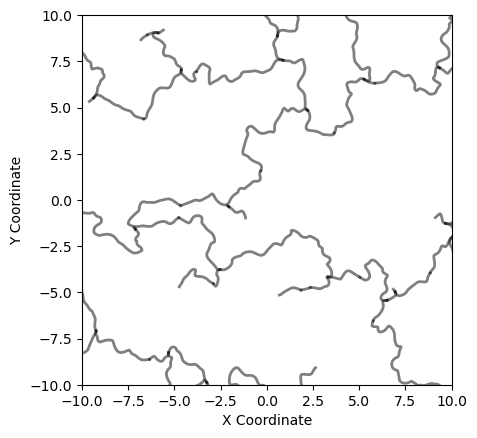

In [8]:
ax = plt.gca()
for i in range(filnum):
    fils.plot_2D(i,fildict)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
ax.set_aspect('equal', adjustable='box')
tick_values = np.linspace(-10,10,9)
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.xticks(tick_values)
plt.yticks(tick_values)
plt.draw()
plt.savefig(f'./FilPics/{name}_nsig{nsig}.png')

In [9]:
galaxies=pd.read_csv(f'../Catalogs/{name}.txt', sep='\t') 

In [10]:
galaxies

,id,px,py,stellar_mass
0,8062501113,-4.471229,-3.813271,9.815062e+04
1,8062502913,8.077204,-2.874620,1.298795e+05
2,8062503386,2.553880,-10.808150,2.698433e+05
3,8062503406,-1.412657,3.870599,3.500229e+05
4,8062503610,6.556006,-6.644307,2.940338e+05
...,...,...,...,...
22112,8082709245,9.915072,5.543546,1.231093e+10
22113,8082711330,11.497860,10.168090,2.762044e+08
22114,8082723473,-7.060151,-3.827097,5.916640e+09
22115,8082744712,-14.340260,-13.390690,7.313263e+08


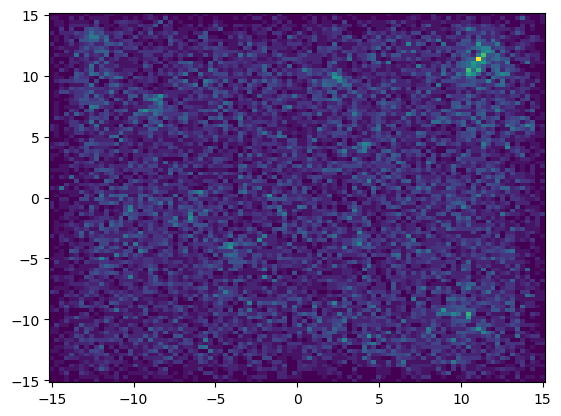

In [11]:
h=plt.hist2d(galaxies.px,galaxies.py,bins=(100,100));

In [12]:
import matplotlib.colors as colors

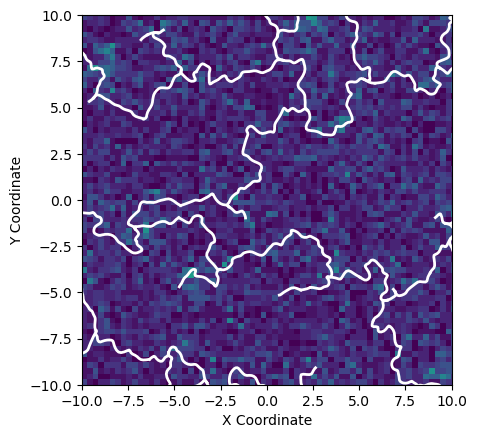

In [13]:
ax = plt.gca()
for i in range(filnum):
    fils.plot_2D(i,fildict,colorfil='white',a=1)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
ax.set_aspect('equal', adjustable='box')
tick_values = np.linspace(-10,10,9)
plt.xticks(tick_values)
plt.yticks(tick_values)
plt.hist2d(galaxies.px,galaxies.py,bins=(100,100))
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.draw()
plt.savefig(f'./FilPics/{name}_nsig{nsig}_density.png')

In [14]:
import scipy

In [15]:
statistic, x_edges, y_edges, _=scipy.stats.binned_statistic_2d(x=galaxies.px,y=galaxies.py,values=None,statistic='count',bins=(100,100))

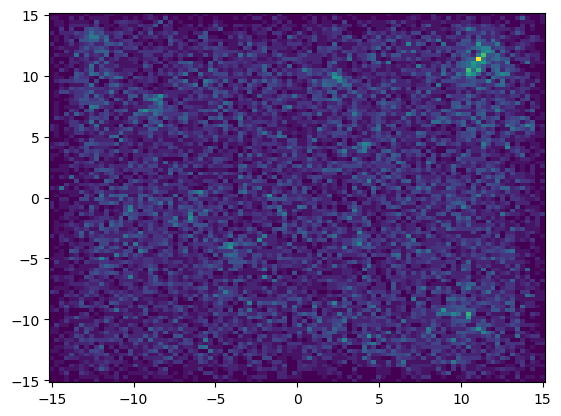

In [16]:
plt.pcolormesh(x_edges, y_edges, statistic.T)

In [17]:
stat2=scipy.ndimage.gaussian_filter(statistic, sigma=2)

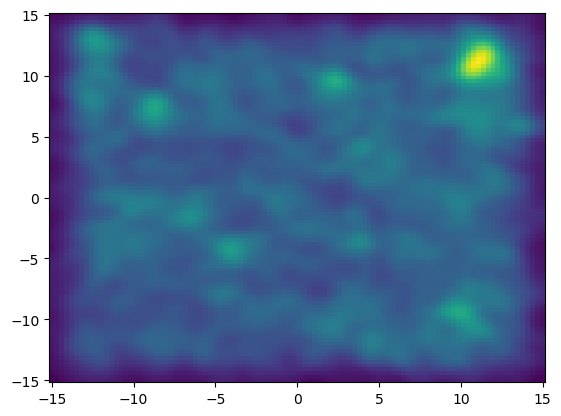

In [18]:
plt.pcolormesh(x_edges, y_edges, stat2.T)

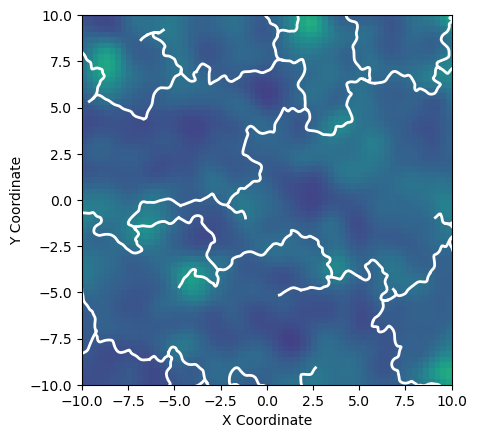

In [19]:
ax = plt.gca()
for i in range(filnum):
    fils.plot_2D(i,fildict,colorfil='white',a=1)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
ax.set_aspect('equal', adjustable='box')
tick_values = np.linspace(-10,10,9)
plt.xticks(tick_values)
plt.yticks(tick_values)
plt.pcolormesh(x_edges, y_edges, stat2.T)
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.draw()
plt.savefig(f'./FilPics/{name}_nsig{nsig}_densitysmooth.png')